Reading classics [Deep Learning Models](https://nbviewer.jupyter.org/github/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-basic.ipynb)

## Code Modules & Functions

In [ ]:
import numpy as np,pandas as pd,pylab as pl
import h5py,torch,urllib,zipfile
from torchvision.datasets import MNIST as tmnist
from torchvision import transforms
from torch.utils.data import DataLoader as tdl
from torch.utils.data import Dataset as tds
import torch.nn.functional as tnnf
from IPython.core.magic import register_line_magic
dev=torch.device("cuda:0" if torch.cuda.is_available() 
                 else "cpu")

In [ ]:
class TData(tds):
    def __init__(self,X,y):   
        self.X=torch.tensor(X,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.int32)
    def __getitem__(self,index):
        train_img,train_lbl=self.X[index],self.y[index]
        return train_img,train_lbl
    def __len__(self):
        return self.y.shape[0]
def model_acc(model,data_loader):
    correct_preds,num_examples=0,0    
    for features,targets in data_loader:
        features=features.to(dev)
        targets=targets.to(dev)
        logits,probs=model(features)
        _,pred_labels=torch.max(probs,1)
        num_examples+=targets.size(0)
        correct_preds+=(pred_labels==targets).sum()        
    return correct_preds.float()/num_examples*100

In [ ]:
@register_line_magic
def train_run(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets)
            optimizer.zero_grad(); cost.backward()
            optimizer.step()
            if not batch_ids%300:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train)//batch_size,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader)))
@register_line_magic
def print_acc(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader)))

In [ ]:
@register_line_magic
def train_run2(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets)
            optimizer2.zero_grad(); cost.backward()
            optimizer2.step()
            if not batch_ids%300:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train)//batch_size,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader)))
@register_line_magic
def print_acc2(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader)))

In [ ]:
@register_line_magic
def train_run3(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader2):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets.long())
            optimizer3.zero_grad(); cost.backward()
            optimizer3.step()
            if not batch_ids%100:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train2)//batch_size2,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader2)))
@register_line_magic
def print_acc3(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader2)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader2)))

## Data

In [ ]:
random_seed=23; batch_size=128
train=tmnist(root='data',train=True,download=True,
            transform=transforms.ToTensor())
test=tmnist(root='data',train=False, 
            transform=transforms.ToTensor())
train_loader=tdl(dataset=train,shuffle=True, 
                 batch_size=batch_size)
test_loader=tdl(dataset=test,shuffle=False, 
                batch_size=batch_size)

Image dimensions: torch.Size([128, 1, 28, 28])
Label dimensions: torch.Size([128])


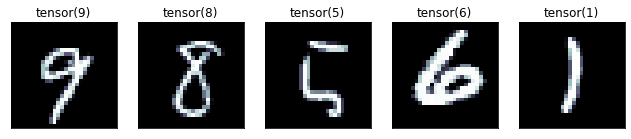

In [ ]:
for images,labels in train_loader:  
    print('Image dimensions: %s'%str(images.shape))
    print('Label dimensions: %s'%str(labels.shape))
    n=np.random.randint(1,50)
    fig=pl.figure(figsize=(11,4))
    for i in range(n,n+5):
        ax=fig.add_subplot(1,5,i-n+1,\
        xticks=[],yticks=[],title=labels[i])
        ax.imshow((images[i]).reshape(28,28),
                  cmap=pl.cm.bone)
    break

['backgrounds', 'images', 'labels']


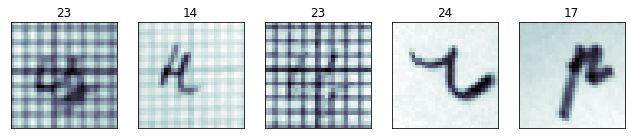

In [ ]:
fpath='https://olgabelitskaya.github.io/'
zf='LetterColorImages_123.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys()); print(keys)
x=np.array(f[keys[1]],dtype='float32')/255
x=(np.dot(x,[.299,.587,.114])).reshape(-1,1,32,32)
y=np.array(f[keys[2]],dtype='int32')-1
N=len(y); n=int(.2*N)
shuffle_ids=np.arange(N)
np.random.RandomState(23).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x_test,x_train=x[:n],x[n:]
y_test,y_train=y[:n],y[n:]
x_train.shape,y_train.shape
fig=pl.figure(figsize=(11,4))
n=np.random.randint(1,50)
for i in range(n,n+5):
    ax=fig.add_subplot(1,5,i-n+1,\
    xticks=[],yticks=[],title=y_test[i])
    ax.imshow((x_test[i].reshape(32,32)),
              cmap=pl.cm.bone)

In [ ]:
random_seed=1; batch_size2=128
train2=TData(x_train,y_train)
test2=TData(x_test,y_test)
train_loader2=tdl(dataset=train2,batch_size=batch_size2,shuffle=True)
test_loader2=tdl(dataset=test2,batch_size=batch_size2,shuffle=False)
for images,labels in train_loader2:  
    print('Image dimensions: %s'%str(images.shape))
    print('Label dimensions: %s'%str(labels.shape))
    break

Image dimensions: torch.Size([128, 1, 32, 32])
Label dimensions: torch.Size([128])


## Simple CNN

In [ ]:
class CNN(torch.nn.Module):
    def __init__(self,num_classes):
        super(CNN,self).__init__()
        # 28x28x1 => 28x28x8; (1*(28-1)-28+3)/2=1
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=8,
                kernel_size=(3,3),
                stride=(1,1),padding=1)
        # 28x28x8 => 14x14x8; (2*(14-1)-28+2)=0 
        self.pool1=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)                                      
        # 14x14x8 => 14x14x16; (1*(14-1)-14+3)/2=1
        self.conv2=torch.nn\
        .Conv2d(in_channels=8,out_channels=16,
                kernel_size=(3,3),
                stride=(1,1),padding=1)                
        # 14x14x16 => 7x7x16; (2*(7-1)-14+2)=0                            
        self.pool2=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)
        self.linear1=torch.nn.Linear(7*7*16,num_classes)
        for m in self.modules():
            if isinstance(m,torch.nn.Conv2d) or \
            isinstance(m,torch.nn.Linear):
                m.weight.data.normal_(0.,.01)
                m.bias.data.zero_()
                if m.bias is not None:
                    m.bias.detach().zero_()
    def forward(self,x):
        y=self.conv1(x); y=tnnf.relu(y)
        y=self.pool1(y)
        y=self.conv2(y); y=tnnf.relu(y)
        y=self.pool2(y)        
        logits=self.linear1(y.view(-1,7*7*16))
        probs=tnnf.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=10; learning_rate=.1
model=CNN(num_classes=num_classes)
model=model.to(dev)
optimizer=torch.optim\
.SGD(model.parameters(),lr=learning_rate)

In [ ]:
%train_run 30

Epoch: 001/030 | Batch 000/468 | Cost: 2.3026
Epoch: 001/030 | Batch 300/468 | Cost: 0.4363
Epoch: 001/030 train accuracy: 91.77%
Epoch: 002/030 | Batch 000/468 | Cost: 0.2957
Epoch: 002/030 | Batch 300/468 | Cost: 0.2573
Epoch: 002/030 train accuracy: 96.29%
Epoch: 003/030 | Batch 000/468 | Cost: 0.1091
Epoch: 003/030 | Batch 300/468 | Cost: 0.0768
Epoch: 003/030 train accuracy: 96.61%
Epoch: 004/030 | Batch 000/468 | Cost: 0.1135
Epoch: 004/030 | Batch 300/468 | Cost: 0.0729
Epoch: 004/030 train accuracy: 96.52%
Epoch: 005/030 | Batch 000/468 | Cost: 0.1598
Epoch: 005/030 | Batch 300/468 | Cost: 0.0409
Epoch: 005/030 train accuracy: 97.53%
Epoch: 006/030 | Batch 000/468 | Cost: 0.0771
Epoch: 006/030 | Batch 300/468 | Cost: 0.0205
Epoch: 006/030 train accuracy: 97.81%
Epoch: 007/030 | Batch 000/468 | Cost: 0.0354
Epoch: 007/030 | Batch 300/468 | Cost: 0.0701
Epoch: 007/030 train accuracy: 97.03%
Epoch: 008/030 | Batch 000/468 | Cost: 0.0671
Epoch: 008/030 | Batch 300/468 | Cost: 0.019

In [ ]:
%print_acc train
%print_acc test

Train accuracy: 99.1850%
Test accuracy: 98.5400%


In [ ]:
class CNN2(torch.nn.Module):
    def __init__(self,num_classes):
        super(CNN2,self).__init__()
        # 28x28x1 => 28x28x16; (1*(28-1)-28+5)/2=2
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=16,
                kernel_size=(5,5),
                stride=(1,1),padding=2)
        # 28x28x16 => 14x14x16; (2*(14-1)-28+2)=0 
        self.pool1=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)                                      
        # 14x14x16 => 14x14x256; (1*(14-1)-14+5)/2=2
        self.conv2=torch.nn\
        .Conv2d(in_channels=16,out_channels=256,
                kernel_size=(5,5),
                stride=(1,1),padding=2)                
        # 14x14x256 => 7x7x256; (2*(7-1)-14+2)=0                            
        self.pool2=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)
        self.linear1=torch.nn.Linear(7*7*256,256)
        self.linear2=torch.nn.Linear(256,num_classes)
    def forward(self,x):
        y=self.conv1(x); y=tnnf.relu(y)
        y=self.pool1(y)
        y=self.conv2(y); y=tnnf.relu(y)
        y=self.pool2(y)
        y=y.view(-1,7*7*256)
        y=self.linear1(y)
        y=tnnf.relu(y)
        logits=self.linear2(y)
        probs=tnnf.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=10; learning_rate=.05
model=CNN2(num_classes=num_classes)
model=model.to(dev)
optimizer2=torch.optim\
.SGD(model.parameters(),lr=learning_rate,momentum=.9) 

In [ ]:
%train_run2 10

Epoch: 001/010 | Batch 000/468 | Cost: 2.3039
Epoch: 001/010 | Batch 300/468 | Cost: 0.1079
Epoch: 001/010 train accuracy: 98.71%
Epoch: 002/010 | Batch 000/468 | Cost: 0.0422
Epoch: 002/010 | Batch 300/468 | Cost: 0.0177
Epoch: 002/010 train accuracy: 99.38%
Epoch: 003/010 | Batch 000/468 | Cost: 0.0039
Epoch: 003/010 | Batch 300/468 | Cost: 0.0504
Epoch: 003/010 train accuracy: 99.62%
Epoch: 004/010 | Batch 000/468 | Cost: 0.0154
Epoch: 004/010 | Batch 300/468 | Cost: 0.0256
Epoch: 004/010 train accuracy: 99.61%
Epoch: 005/010 | Batch 000/468 | Cost: 0.0372
Epoch: 005/010 | Batch 300/468 | Cost: 0.0029
Epoch: 005/010 train accuracy: 99.58%
Epoch: 006/010 | Batch 000/468 | Cost: 0.0383
Epoch: 006/010 | Batch 300/468 | Cost: 0.0073
Epoch: 006/010 train accuracy: 99.77%
Epoch: 007/010 | Batch 000/468 | Cost: 0.0043
Epoch: 007/010 | Batch 300/468 | Cost: 0.0040
Epoch: 007/010 train accuracy: 99.91%
Epoch: 008/010 | Batch 000/468 | Cost: 0.0017
Epoch: 008/010 | Batch 300/468 | Cost: 0.000

In [ ]:
%print_acc2 train
%print_acc2 test

Train accuracy: 99.8883%
Test accuracy: 99.2100%


In [ ]:
class CNN3(torch.nn.Module):
    def __init__(self,num_classes):
        super(CNN3,self).__init__()
        # 32x32x1 => 32x32x32; (1*(32-1)-32+5)/2=2
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=32,
                kernel_size=(5,5),
                stride=(1,1),padding=2)
        # 32x32x32 => 16x16x32; (2*(16-1)-32+2)=0 
        self.pool1=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)                                      
        # 16x16x32 => 16x16x196; (1*(16-1)-16+5)/2=2
        self.conv2=torch.nn\
        .Conv2d(in_channels=32,out_channels=196,
                kernel_size=(5,5),
                stride=(1,1),padding=2)                
        # 16x16x196 => 8x8x196; (2*(8-1)-16+2)=0                            
        self.pool2=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)
        self.linear1=torch.nn.Linear(8*8*196,1024)
        self.linear2=torch.nn.Linear(1024,num_classes)
        for m in self.modules():
            if isinstance(m,torch.nn.Conv2d):
                torch.nn.init.kaiming_normal_(m.weight.detach())
                m.bias.detach().zero_()
            elif isinstance(m,torch.nn.Linear):
                torch.nn.init.kaiming_normal_(m.weight.detach())
                m.bias.detach().zero_()
    def forward(self,x):
        y=self.conv1(x); y=tnnf.relu(y)
        y=self.pool1(y)
        y=self.conv2(y); y=tnnf.relu(y)
        y=self.pool2(y)
        y=y.view(-1,8*8*196)
        y=self.linear1(y)
        y=tnnf.relu(y)
        logits=self.linear2(y)
        probs=tnnf.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=33; learning_rate=.05
model=CNN3(num_classes=num_classes)
model=model.to(dev)
optimizer3=torch.optim\
.SGD(model.parameters(),lr=learning_rate,momentum=.9) 

In [ ]:
%train_run3 30

Epoch: 001/030 | Batch 000/088 | Cost: 3.8341
Epoch: 001/030 train accuracy: 5.01%
Epoch: 002/030 | Batch 000/088 | Cost: 3.4278
Epoch: 002/030 train accuracy: 4.77%
Epoch: 003/030 | Batch 000/088 | Cost: 3.3760
Epoch: 003/030 train accuracy: 15.33%
Epoch: 004/030 | Batch 000/088 | Cost: 2.9411
Epoch: 004/030 train accuracy: 40.11%
Epoch: 005/030 | Batch 000/088 | Cost: 2.0295
Epoch: 005/030 train accuracy: 60.40%
Epoch: 006/030 | Batch 000/088 | Cost: 1.6020
Epoch: 006/030 train accuracy: 69.85%
Epoch: 007/030 | Batch 000/088 | Cost: 0.9440
Epoch: 007/030 train accuracy: 72.42%
Epoch: 008/030 | Batch 000/088 | Cost: 0.8161
Epoch: 008/030 train accuracy: 79.91%
Epoch: 009/030 | Batch 000/088 | Cost: 0.6226
Epoch: 009/030 train accuracy: 83.21%
Epoch: 010/030 | Batch 000/088 | Cost: 0.5466
Epoch: 010/030 train accuracy: 87.33%
Epoch: 011/030 | Batch 000/088 | Cost: 0.3830
Epoch: 011/030 train accuracy: 87.40%
Epoch: 012/030 | Batch 000/088 | Cost: 0.3408
Epoch: 012/030 train accuracy: 9

In [ ]:
%print_acc3 train
%print_acc3 test

Train accuracy: 98.3968%
Test accuracy: 77.6603%
